# 60-minute blitz

http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

## Getting started

### Tensors

* Like ndarrays but can be used on GPUs.

In [1]:
import torch

* Construct a 5x3 matrix uninitialised.

In [2]:
x = torch.Tensor(5, 3)

In [3]:
print(x)


 0.0000e+00  2.0000e+00 -7.6443e+22
-1.5849e+29  8.4078e-45  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
-7.6398e+22 -1.0845e-19  0.0000e+00
[torch.FloatTensor of size 5x3]



* Construct a randomly initialised matrix.

In [4]:
x = torch.rand(5, 3)

In [5]:
print(x)


 0.8373  0.7383  0.2644
 0.9405  0.2807  0.1505
 0.7672  0.6879  0.7104
 0.9893  0.3989  0.2087
 0.0258  0.4853  0.8118
[torch.FloatTensor of size 5x3]



In [9]:
print(x.size())

torch.Size([5, 3])


### Operations

In [10]:
y = torch.rand(5, 3)

In [11]:
print(x + y)


 1.2988  0.8416  1.0662
 1.6944  0.8925  0.9409
 1.5882  1.4218  1.6692
 0.9968  0.7080  0.3703
 0.0390  1.1604  1.3318
[torch.FloatTensor of size 5x3]



In [12]:
print(torch.add(x, y))


 1.2988  0.8416  1.0662
 1.6944  0.8925  0.9409
 1.5882  1.4218  1.6692
 0.9968  0.7080  0.3703
 0.0390  1.1604  1.3318
[torch.FloatTensor of size 5x3]



* Provide output tensor as argument:

In [13]:
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)
print(result)


 1.2988  0.8416  1.0662
 1.6944  0.8925  0.9409
 1.5882  1.4218  1.6692
 0.9968  0.7080  0.3703
 0.0390  1.1604  1.3318
[torch.FloatTensor of size 5x3]



* * Any operation that mutates a tensor in-place is post-fixed with an `_`. Example, here's how to add in place:

In [14]:
y.add_(x)
print(y)


 1.2988  0.8416  1.0662
 1.6944  0.8925  0.9409
 1.5882  1.4218  1.6692
 0.9968  0.7080  0.3703
 0.0390  1.1604  1.3318
[torch.FloatTensor of size 5x3]



* Can use standard NumPy-like indexing: 

In [16]:
print(x[:, 1])


 0.7383
 0.2807
 0.6879
 0.3989
 0.4853
[torch.FloatTensor of size 5]



* If you want to resize/reshape the tensor, you can use `torch.view`:

In [18]:
x = torch.rand(28, 28, 3)

In [20]:
x.shape

torch.Size([28, 28, 3])

In [22]:
x_batch = x.view(1, 28, 28, 3)

In [23]:
x_batch.shape

torch.Size([1, 28, 28, 3])

### NumPy Bridge

* When you convert a NumPy array to Torch tensor, they will share underlying memory locations. Changing one will change the other:

In [25]:
a = torch.ones(5)
print(a)


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]



In [26]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [28]:
a.add_(1)
print(a)
print(b)


 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]

[2. 2. 2. 2. 2.]


* Can also go the other way:

In [29]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



### CUDA Tensors

* Tensors can be moved on the GPU using the `.cuda` method:

In [30]:
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    x = y

## Autograd: automatic differentiation

* `autograd` package does automatic differentiation for all Tensor operations.

## Variable

* `autograd.Variable` wraps a Tensor and supports most operations defined on them. 
  * Access raw tensor using `.data`.
  * Gradient with respect to the variable is accumulated into `grad`.
* `autograd.Function` are used to build up acyclic graph that stores a history of computation.
  * Each variable has a `.grad_fn` attribute that refs a `Function`.
* Run `Variable.backward()` to have all gradients computed automatically.
  * If value is a scalar, don't need any arguments to `backward()`.
  * If it has more elements, need to specify a `gradient` argument.

In [31]:
import torch
from torch.autograd import Variable

In [32]:
x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [33]:
y = x + 2
print(y)

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [34]:
print(y.grad_fn)

In [36]:
z = y * y * 3
out = z.mean()
print(z, out)

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



In [37]:
print(z.grad_fn)

In [38]:
out.grad_fn

In [39]:
out.backward()

In [40]:
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



In [41]:
z

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]

In [43]:
x = torch.randn(3)
x = Variable(x, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2
    
print(y)

Variable containing:
 -865.4074
 1549.4265
  -89.0293
[torch.FloatTensor of size 3]



In [44]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

print(x.grad)

Variable containing:
  204.8000
 2048.0000
    0.2048
[torch.FloatTensor of size 3]



## Neural Networks

* `nn.Module` - neural network module.
  * Encapsulated params with helpers for moving to GPU, exporting, loading, etc.

### Defining a network

* You need to define the `forward` function. `backward` function is a automatically defined for you using `autograd`.

In [45]:
from torch import nn
from torch.nn import functional as F

In [46]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # 1 input image channel, 6 output channels, 5x5 square convolution kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        
        # Max pooling over a (2, 2) window.
        x = F.max_pool2d(x, (2, 2))
        
        x = F.relu(self.conv2(x))
        
        # Same as before, except using a single value to represent the size which
        # assumes a square.
        x = F.max_pool2d(x, 2)
        
        # Flatten
        x = x.view(-1, self.num_flat_features(x))
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        
        x = self.fc3(x)

        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [47]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


* Can find all learnable parameters of a model using `model.parameters()`:

In [48]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


* Expected input size is 32x32:

In [49]:
input = Variable(torch.randn(1, 1, 32, 32))
out = net(input)
print(out)

Variable containing:
-0.0516 -0.1052 -0.0639  0.0303  0.0067 -0.0453 -0.0341  0.0924  0.0128  0.1216
[torch.FloatTensor of size 1x10]



* Zero gradient buffers of all params and backprops with random gradients:

In [50]:
net.zero_grad()
out.backward(torch.randn(1, 10))

* Inputs to everything in the `torch.nn` package are mini-batches of samples, not a single sample.
  * Add a fake dimension with `input.unsqueeze(0)`:

In [68]:
inp = Variable(torch.randn(1, 32, 32))

In [69]:
print(inp.shape)

torch.Size([1, 32, 32])


In [70]:
inp_batch = inp.unsqueeze(0)

In [71]:
print(inp_batch.shape)

torch.Size([1, 1, 32, 32])


### Loss Function

* Several loss functions in the `nn` package.
  * Simple loss: `nn.MSELoss` which calculates the mean squared error betweens outputs and target.

In [81]:
output = net(inp_batch)
target = Variable(torch.arange(1, 11))
target = target.view(1, -1)
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

Variable containing:
 38.2451
[torch.FloatTensor of size 1]



In [82]:
print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

### Backprop

* To backpropagate the error, call `loss.backward()`.
  * Need to clear the existing gradients first, or else they'll be accumulated.

In [83]:
net.zero_grad()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

conv1.bias.grad after backward
Variable containing:
1.00000e-02 *
  0.7114
 -4.5536
 -2.8932
 -9.5142
  1.6317
  2.1173
[torch.FloatTensor of size 6]



### Update the weights

* To implement the SGD update rule: `weight = weight - learning_rate * gradient`:

In [87]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

* Since there are other optimisation algorithms, Torch provides a package that implements a lot of these in `torch.optim`:

In [89]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.01)

optimizer.zero_grad()

In [91]:
output = net(inp_batch)

In [93]:
loss = criterion(output, target)
loss.backward()

optimizer.step()

## Training the classifier

Want to perform the following steps:

1. Load and normalise the CIFAR10 training and test sets.
2. Define a Convolution Neural Network.
3. Define a loss function.
4. Train the network on training data.
5. Test the network on test data.

### 1. Load and normalize CIFAR10

In [94]:
import torch
import torchvision
import torchvision.transforms as transforms

* Output of PILImage images are of range 0-1, we want them -1 to 1:

In [96]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=4, shuffle=False, num_workers=2)

Files already downloaded and verified


In [97]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [98]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    # Unnormalise
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [99]:
# Get some images at random
images, labels = next(iter(trainloader))

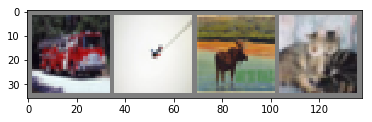

In [100]:
imshow(torchvision.utils.make_grid(images))

In [101]:
print(' '.join(f'{classes[labels[j]]}' for j in range(4)))

truck plane deer cat


### 2. Define a CNN

In [102]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [103]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.pool = nn.MaxPool2d(2, 2)
            
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        # Flatten
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
    
net = Net()

### 3. Define a loss function and optimizer

In [104]:
import torch.optim as optim

In [105]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 4. Train the network

In [107]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get the input data
        inputs, labels = data
        
        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print stats
        running_loss += loss.data[0]
        if i % 2000 == 1999:
            print(f'{epoch + 1} {i + 1} loss: {running_loss / 2000}')
            running_loss = 0.0
            
print('Finished training')

1 2000 loss: 2.1936859393715857
1 4000 loss: 1.9162742663621903
1 6000 loss: 1.716825078845024
1 8000 loss: 1.6106379229426384
1 10000 loss: 1.5585327709764243
1 12000 loss: 1.5175080568492412
2 2000 loss: 1.444005235865712
2 4000 loss: 1.4348339248225093
2 6000 loss: 1.3821665869578719
2 8000 loss: 1.3699464064389468
2 10000 loss: 1.3347010424658656
2 12000 loss: 1.3258742596581579
Finished training


### 5. Test the network on test data

GroundTruth:  cat ship ship plane


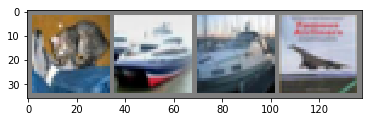

In [110]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]}' for j in range(4)))

In [111]:
outputs = net(Variable(images))

In [115]:
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]}' for j in range(4)))

Predicted:  cat car plane ship


In [117]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total}')

Accuracy of the network on the 10000 test images: 54.2


In [118]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print(f'Accuracy of {classes[i]} : {100 * class_correct[i] / class_total[i]}')

Accuracy of plane : 66.2
Accuracy of car : 62.6
Accuracy of bird : 30.3
Accuracy of cat : 40.4
Accuracy of deer : 35.4
Accuracy of dog : 52.2
Accuracy of frog : 72.2
Accuracy of horse : 63.1
Accuracy of ship : 63.4
Accuracy of truck : 56.2


### Training on GPU

* To recursively loop over all modules, converting them to CUDA tensors, run the following:

In [ ]:
net.cuda()

In [ ]:
inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())